Idealmente quiero poder encontrar películas para explicar mejor la bifurcación greedy de los árboles de decisión que hacen tanto xgboost como random forest. Idealmente usando géneros y los labels ya asignados puedo encontrar una muestra de 8 casos con 3 features que los divida en 5 y 3 el primero y 3 y 2, y 2 y 1 el segundo.

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('data/prepared.csv').set_index('id').join(pd.read_csv('data/label.csv').set_index('id'), how='inner')
df

,Unnamed: 0,action,adventure,animation,comedy,crime,documentary,drama,family,fantasy,...,普通话,budget,popularity,revenue,runtime,vote_average,vote_count,original_title,label,Unnamed: 3
id,,,,,,,,,,,,,,,,,,,,,
19995,0,1,1,0,0,0,0,0,0,1,...,0,237000000,150.437577,2787965087,162.0,7.2,11800,Avatar,g,NaN
285,1,1,1,0,0,0,0,0,0,1,...,0,300000000,139.082615,961000000,169.0,6.9,4500,Pirates of the Caribbean: At World's End,g,NaN
206647,2,1,1,0,0,1,0,0,0,0,...,0,245000000,107.376788,880674609,148.0,6.3,4466,Spectre,s,NaN
49026,3,1,0,0,0,1,0,1,0,0,...,0,250000000,112.312950,1084939099,165.0,7.6,9106,The Dark Knight Rises,b,NaN
49529,4,1,1,0,0,0,0,0,0,0,...,0,260000000,43.926995,284139100,132.0,6.1,2124,John Carter,s,NaN
559,5,1,1,0,0,0,0,0,0,1,...,0,258000000,115.699814,890871626,139.0,5.9,3576,Spider-Man 3,b,NaN
38757,6,0,0,1,0,0,0,0,0,0,...,0,260000000,48.681969,591794936,100.0,7.4,3330,Tangled,g,NaN
99861,7,1,1,0,0,0,0,0,0,0,...,0,280000000,134.279229,1405403694,141.0,7.3,6767,Avengers: Age of Ultron,b,NaN
767,8,0,1,0,0,0,0,0,0,1,...,0,250000000,98.885637,933959197,153.0,7.4,5293,Harry Potter and the Half-Blood Prince,g,NaN


In [20]:
from IPython.core.display import HTML

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    v = (df[(df['label'] == 'g') | (df['label'] == 'b')][['label', 'original_title', 'action', 'adventure', 'animation', 'comedy', 'drama', 'fantasy', 'romance', 'war']].sort_values('label'))
    display(HTML(v.to_html()))

,label,original_title,action,adventure,animation,comedy,drama,fantasy,romance,war
id,,,,,,,,,,
15512,b,Monsters vs Aliens,0,1,1,0,0,0,0,0
272,b,Batman Begins,1,0,0,0,1,0,0,0
8373,b,Transformers: Revenge of the Fallen,1,1,0,0,0,0,0,0
91314,b,Transformers: Age of Extinction,1,1,0,0,0,0,0,0
168259,b,Furious 7,1,0,0,0,0,0,0,0
38356,b,Transformers: Dark of the Moon,1,1,0,0,0,0,0,0
62177,b,Brave,1,1,1,1,0,1,0,0
1858,b,Transformers,1,1,0,0,0,0,0,0
68721,b,Iron Man 3,1,1,0,0,0,0,0,0


In [27]:
sample = v.sample(8, random_state=0)
sample

,label,original_title,action,adventure,animation,comedy,drama,fantasy,romance,war
id,,,,,,,,,,
10527,g,Madagascar: Escape 2 Africa,0,0,1,0,0,0,0,0
10192,g,Shrek Forever After,0,1,1,1,0,1,0,0
36668,g,X-Men: The Last Stand,1,1,0,0,0,0,0,0
38757,g,Tangled,0,0,1,0,0,0,0,0
76338,b,Thor: The Dark World,1,1,0,0,0,1,0,0
604,b,The Matrix Reloaded,1,1,0,0,0,0,0,0
14160,g,Up,0,1,1,1,0,0,0,0
57158,b,The Hobbit: The Desolation of Smaug,0,1,0,0,0,1,0,0


In [35]:
pd.DataFrame([sample.sum()])

,label,original_title,action,adventure,animation,comedy,drama,fantasy,romance,war
0,ggggbbgb,Madagascar: Escape 2 AfricaShrek Forever After...,3,6,4,2,0,3,0,0


In [32]:
sample.groupby('label').sum()

,action,adventure,animation,comedy,drama,fantasy,romance,war
label,,,,,,,,
b,2,3,0,0,0,2,0,0
g,1,3,4,2,0,1,0,0


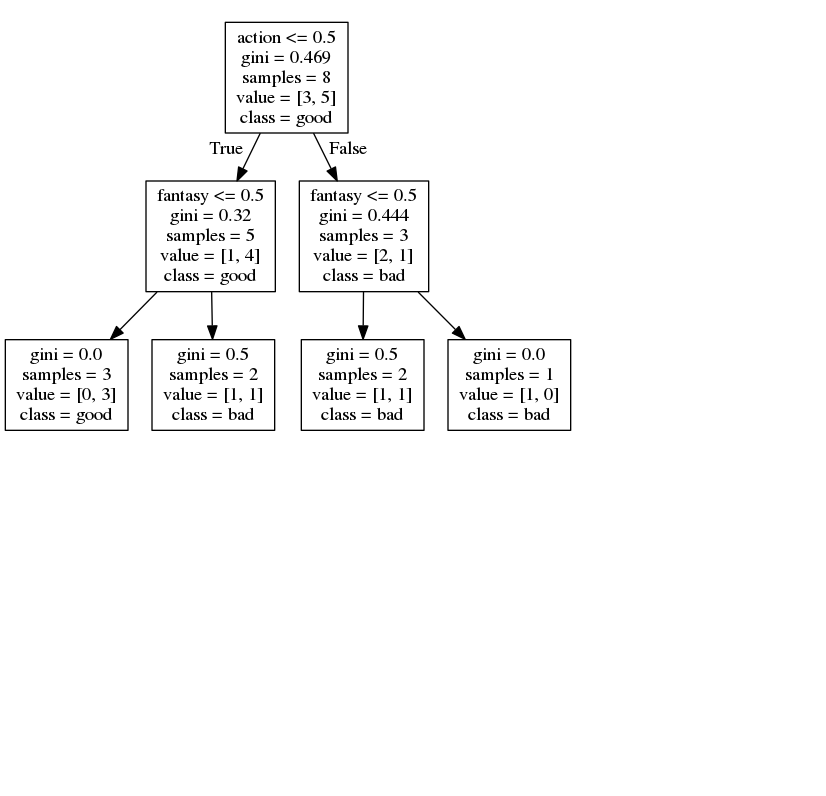

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0,n_estimators=1,max_depth=2, bootstrap=False,
                            ).fit(sample.drop(['label', 'original_title'], axis=1), sample['label'])
import os
import subprocess
from sklearn.tree import export_graphviz

export_graphviz(rfc.estimators_[0], '/tmp/tree0.dot', feature_names=sample.columns.tolist()[2:], class_names=['bad', 'good'])
subprocess.check_call('dot -Tpng /tmp/tree0.dot -o /tmp/tree0.png', shell=True)
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

plt.figure(1, (14, 14))
plt.axis('off')
pil_im = Image.open('/tmp/tree0.png', 'r')
plt.figimage(np.asarray(pil_im), 0, 360, cmap='gray')
os.unlink('/tmp/tree0.dot')
os.unlink('/tmp/tree0.png')